# Voorspellen van credit card fraude
Een bekende dataset op Kaggle is de Credit Card Fraud Detection dataset. Je vindt meer informatie hierover via deze link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In deze opdracht gaan we weer aan de slag met deze dataset. Het doel is om zoveel mogelijk credit card fraude te herkennen, nu aan de hand van zogenaamde 'Tree Based' algoritmes. In dit notebook behandelen we onder andere random forest en twee boosting algoritmes.

- Voer onderstaande cel uit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1A Inlezen data
- Lees de data in creditcard.csv in als een dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_10/creditcard.csv').dropna()

In [ ]:
df.drop(['Time', 'Amount'], axis = 1, inplace = True)

## 2 Bagging

### 2A Bagging terminologie
- Leg uit wat bagging is? Gebruik daarbij onder andere de termen 'bootstrap' en 'steekproef met terugleggen'.
- Leg uit hoe een bagging model wordt getraind.
- Leg uit hoe voorspellingen tot stond komen voor een bagging model. Leg dit uit voor zowel een classificatie-model als voor een regressie-model.

 - Bagging means bootstrap aggregation. Uses different subset of the data.
 - Reduces variance of individual models.
 - Bagging takes n models bootstrap samples from the training set to train n models. 
 - Predictions by majority voting for BaggingClassifier
 - Predictions through averaging for BaggingRegressor

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


### 2B train-test plit
- Splits de data in X en y
- Splits de data in trainsets en testsets

In [ ]:
df.isna().any().any()

False

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

### 2C importeren
- importeer van sklearn:
    - Bagging classifier
    - Decision Tree classifier
    - f1 score

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### 2D Bagging vs Decision Tree
- "Instantiate" een decision tree classifier volgens onderstaande schermprint
- "Instantiate" een bagging classifier voor deze decision tree classifier. Kies voor 100 trees en kies een random state.
- Fit de bagging classifier op de trainingsdata
- Maak voorspellingen voor de testdata
- Vergelijk de resultaten voor de bagging classifier met de resultaten uit onderstaande schermprint.


In [ ]:
tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=0)
bc = BaggingClassifier(base_estimator=tree, n_estimators=100, n_jobs=-1, max_features=1.0)

In [ ]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

In [ ]:
score = f1_score(y_test, y_pred)
print(score)

0.8202247191011237


## 3 Random Forest

### 3A RF terminologie
- Leg uit hoe een random forest wordt opgebouwd en beschrijf het belangrijkste verschil tussen een random forest en bagging.

In [ ]:
"""
Bagging:
- Base estimator can be any model : decision tree, logistic regression, meural network.
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction.

Random forest:
- Base estimator is Decision Tree
- Bootstrap samples have the same size as the training set
- Further randomization in the training of individual trees.
- So it doesnt use all the futures for sampling.
"""

### 3C Random forest toepassen
- Pas een random forest model toe met als parameters:
    - criterion: entropy
    - aantal 'trees' : 100
    - maximale diepte: 10
- Bepaal de f1 score voor de test set.
- Vergelijk het resultaat met de 'bagging' methode.

In [47]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
test_score = f1_score(y_test, y_pred)
print(test_score)

0.8324324324324324


### 4A feature importances
- Toon een barplot met daarin de feature importances van de random forest
- Leg uit hoe je dit overzicht kunt interpreteren
- Wat kun je hieruit wel opmaken, maar wat ook niet?

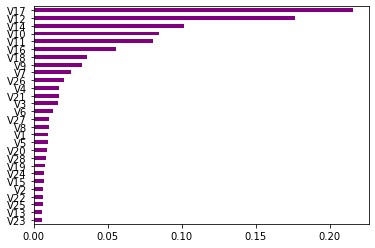

In [48]:
from pandas.core.algorithms import searchsorted
import matplotlib.pyplot as plt

importances = pd.Series(forest.feature_importances_, index = X.columns)
                                 
sorted = importances.sort_values()   

sorted.plot(kind='barh', color='purple'); plt.show()


### 5A Boosting terminologie
- Leg uit hoe boosting werkt? Gebruik hierbij o.a. de term "weak learner" en lege deze uit.
- Leg uit hoe ADA boosting werkt. Gebruik hierbij o.a. de term wegingsfactor en leg deze uit.
- Leg uit hoe gradient boosting werkt. Gebruik hierbij o.a. de term "errors" en leg deze uit.

In [ ]:
# Boosting is an ensemble method combining several "weak learner" models to form a strong learner.

### 5B ADA boosting
- Train een ADA Boosting classifier, maak daarbij een "educated guess" voor de parameter max_depth en het aantal trees.
- Beoordeel de uitkomst aan de hand van de f1 score


In [49]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,    
                                                    random_state=0)

tree3 = DecisionTreeClassifier(max_depth=1, random_state=0)
cardano = AdaBoostClassifier(base_estimator=tree3, n_estimators=100)
cardano.fit(X_train, y_train)
y_pred_proba = cardano.predict_proba(X_test)[:,1]
# score = f1_score(y_test, y_pred_proba)
print(f1_score(y_test, y_pred_proba))


ValueError: ignored

### 5C Gradient boosting
- Train een ADA Boosting classifier, maak daarbij een "educated guess" voor de parameter max_depth en het aantal trees (estimators).
- Beoordeel de uitkomst aan de hand van de f1 score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as MSE
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=0)

gr_boost = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=0)
gr_boost.fit(X_train, y_train)
y_pred = gr_boost.predict(X_test)

rmse_test = MSE(y_test, y_pred) ** (1/2)
print(rmse_test)

### 5D Stochastic Gradient boosting
- Train een Stochastic Gradient Boosting classifier, maak daarbij een "educated guess" voor de parameter max_depth en het aantal trees.
- Beoordeel de uitkomst aan de hand van de f1 score

## 6 Tuning
Tuning met grid search van random forests en boosting modellen is erg tijdrovend omdat het lang duurt om een model te trainen. Bij gridsearch wordt ook cross validation toegepast waardoor het model erg vaak getraind wordt.


### 6A Toepassen gridsearch
- Pas gridsearch met crossvalidation toe op 3 modellen:
  - Decision Tree
  - Random forest
  - Gradient boosting of ADA boosting
- Beschrijf je ervaringen

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = 
